<a href="https://colab.research.google.com/github/DD-SQUARED/University_Assignments_CS/blob/main/KMeans_Clustering_of_Fitness_Tracker_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Active Cluster: 338 users
Moderately active Cluster: 732 users
Least active Cluster: 767 users


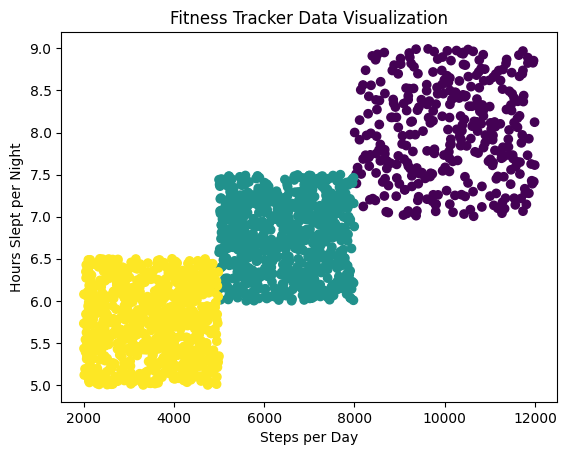

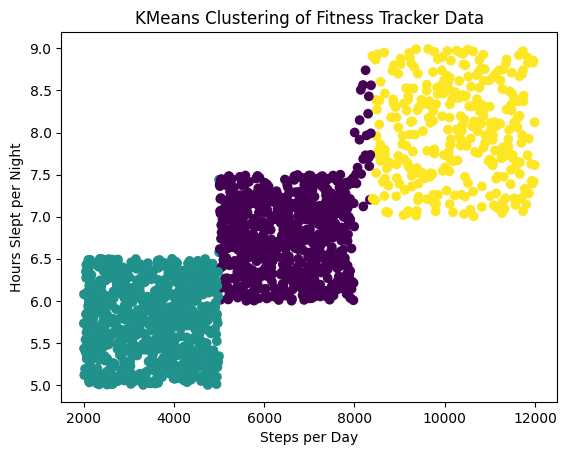

Cluster 1:
  Average Steps per Day: 6504.66
  Average Hours Slept per Night: 6.81
Cluster 2:
  Average Steps per Day: 3500.09
  Average Hours Slept per Night: 5.75
Cluster 3:
  Average Steps per Day: 10230.11
  Average Hours Slept per Night: 8.01
Accuracy: 0.9863908546543277


In [ ]:
#31506534 - A,Nare

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the parameters for the three clusters with a random number of users for each cluster
clusters = {
    "Active": {
        "steps_per_day": (8000, 12000),
        "hours_slept_per_night": (7, 9),
        "N": np.random.randint(100, 1001)  # Random number of users between 100 and 1000
    },
    "Moderately active": {
        "steps_per_day": (5000, 8000),
        "hours_slept_per_night": (6, 7.5),
        "N": np.random.randint(100, 1001)  # Random number of users between 100 and 1000
    },
    "Least active": {
        "steps_per_day": (2000, 5000),
        "hours_slept_per_night": (5, 6.5),
        "N": np.random.randint(100, 1001)  # Random number of users between 100 and 1000
    }
}

# Print the number of users for each cluster
for cluster_name, params in clusters.items():
    print(f"{cluster_name} Cluster: {params['N']} users")

# Initialize arrays to hold the data
X = []
y = []

# Generate data for each cluster
for label, params in enumerate(clusters.values()):
    steps = np.random.uniform(params["steps_per_day"][0], params["steps_per_day"][1], params["N"])
    hours_slept = np.random.uniform(params["hours_slept_per_night"][0], params["hours_slept_per_night"][1], params["N"])
    cluster_data = np.vstack((steps, hours_slept)).T
    X.append(cluster_data)
    y.extend([label] * params["N"])

# Concatenate the data from all clusters
X = np.concatenate(X, axis=0)
y = np.array(y)

#31506534 - A,Nare
# Data Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel("Steps per Day")
plt.ylabel("Hours Slept per Night")
plt.title("Fitness Tracker Data Visualization")
plt.show()

# Define the number of clusters (should be 3 for this dataset)
n_clusters = 3
# Create a KMeans object with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels assigned by KMeans
kmeans_labels = kmeans.labels_

# Cluster Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel("Steps per Day")
plt.ylabel("Hours Slept per Night")
plt.title("KMeans Clustering of Fitness Tracker Data")
plt.show()

# Cluster Analysis
# Calculate and print the average steps and sleep values for each cluster
for cluster in range(n_clusters):
    cluster_mask = (kmeans_labels == cluster)
    avg_steps = np.mean(X[cluster_mask, 0])
    avg_sleep = np.mean(X[cluster_mask, 1])
    print(f"Cluster {cluster + 1}:")
    print(f"  Average Steps per Day: {avg_steps:.2f}")
    print(f"  Average Hours Slept per Night: {avg_sleep:.2f}")

# Calculate accuracy if true labels are known (optional)
aligned_labels = np.zeros_like(kmeans_labels)
for cluster in range(n_clusters):
    mask = (kmeans_labels == cluster)
    aligned_labels[mask] = np.argmax(np.bincount(y[mask]))

#31506534 - A,Nare
accuracy = np.sum(aligned_labels == y) / len(y)
print("Accuracy:", accuracy)
